In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub
import os

Dataset Source
https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales

# Read Data

In [2]:
file_path = '/Users/Fikry/datasets/CoffeeShopSales.xlsx'
df_coffee = pd.read_excel(file_path)
df_coffee

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [3]:
df_coffee.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [4]:
df_coffee.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df_coffee.duplicated().sum()

0

In [6]:
df_coffee.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [7]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [8]:
df_coffee['transaction_date'] = pd.to_datetime(df_coffee['transaction_date'])

# Find the date and time range
min_date = df_coffee['transaction_date'].min()
max_date = df_coffee['transaction_date'].max()
min_time = df_coffee['transaction_time'].min()
max_time = df_coffee['transaction_time'].max()

print("Date Range:", min_date, "to", max_date)
print("Time Range:", min_time, "to", max_time)

Date Range: 2023-01-01 00:00:00 to 2023-06-30 00:00:00
Time Range: 06:00:00 to 20:59:32


In [9]:
# Extract Datetime
df_coffee['year'] = df_coffee['transaction_date'].dt.year
df_coffee['month'] = df_coffee['transaction_date'].dt.month
df_coffee['day'] = df_coffee['transaction_date'].dt.day

In [10]:
df_coffee['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [11]:
df_coffee['store_id'].unique()

array([5, 8, 3], dtype=int64)

In [12]:
# Category of product
df_coffee['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [13]:
# Type of product
df_coffee['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [14]:
# Detail Product
df_coffee['product_detail'].unique()

array(['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg',
       'Our Old Time Diner Blend Sm', 'Oatmeal Scone',
       'Columbian Medium Roast Sm', 'Latte Rg', 'Dark chocolate Rg',
       'Spicy Eye Opener Chai Rg', 'Ethiopia Lg', 'Earl Grey Lg',
       'Ouro Brasileiro shot', 'Serenity Green Tea Lg',
       'Jumbo Savory Scone', 'Lemon Grass Rg',
       'Sustainably Grown Organic Lg', 'Hazelnut Biscotti', 'Cappuccino',
       'Lemon Grass Lg', 'Chocolate Chip Biscotti', 'Peppermint Lg',
       'Chocolate Croissant', 'Latte', 'Brazilian Rg', 'Brazilian Lg',
       'Columbian Medium Roast Rg', 'Morning Sunrise Chai Rg',
       'Morning Sunrise Chai Lg', 'Our Old Time Diner Blend Lg',
       'Sustainably Grown Organic Rg', 'Scottish Cream Scone ',
       'Peppermint Rg', 'English Breakfast Rg',
       'Our Old Time Diner Blend Rg', 'Serenity Green Tea Rg',
       'Brazilian Sm', 'Jamaican Coffee River Sm',
       'Jamaican Coffee River Lg', 'Ginger Biscotti',
       'Tradit

In [15]:
df_coffee['product_category'].value_counts()

Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: product_category, dtype: int64

In [16]:
# Extract time
df_coffee['transaction_date'] = pd.to_datetime(df_coffee['transaction_date'])
df_coffee['transaction_time'] = pd.to_datetime(df_coffee['transaction_time'], format='%H:%M:%S').dt.time
df_coffee['month'] = df_coffee['transaction_date'].dt.month
df_coffee['year'] = df_coffee['transaction_date'].dt.year
df_coffee['day_of_week'] = df_coffee['transaction_date'].dt.day_name()
df_coffee['hour'] = pd.to_datetime(df_coffee['transaction_time'].astype(str), format='%H:%M:%S').dt.hour
df_coffee['month_name'] = pd.to_datetime(df_coffee['month'], format='%m').dt.month_name()

# Exploratory Data Analysis

In [17]:
# Total earnings sales last month
df_coffee['total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']
latest_month = df_coffee['month'].max()
sales_last_month = df_coffee[df_coffee['month'] == latest_month]['total_sales'].sum()
print(f"Month: {latest_month}, Total Earnings:{sales_last_month}")

Month: 6, Total Earnings:166485.88


In [18]:
# Total earnings product sales in every month

total_sales_by_month = df_coffee.groupby(df_coffee['transaction_date'].dt.month)['total_sales'].sum().reset_index()
total_sales_by_month.columns = ['Month', 'Total Product Earnings']
total_sales_by_month['Month'] = pd.to_datetime(total_sales_by_month['Month'], format='%m').dt.month_name()
total_sales_by_month

,Month,Total Product Earnings
0,January,81677.74
1,February,76145.19
2,March,98834.68
3,April,118941.08
4,May,156727.76
5,June,166485.88


In [19]:
# Monthly earnings in each store
total_sales_by_month_store = df_coffee.groupby([df_coffee['transaction_date'].dt.month, 'store_location'])['total_sales'].sum().reset_index()
total_sales_by_month_store.columns = ['Month', 'Store Location', 'Total Sales']
total_sales_by_month_store['Month'] = pd.to_datetime(total_sales_by_month_store['Month'], format='%m').dt.month_name()
pivot_table = total_sales_by_month_store.pivot_table(index='Store Location', columns='Month', values='Total Sales')
pivot_table

Month,April,February,January,June,March,May
Store Location,,,,,,
Astoria,39477.61,25105.34,27313.66,55083.11,32835.43,52428.76
Hell's Kitchen,40304.14,25719.80,27820.65,56957.08,33110.57,52598.93
Lower Manhattan,39159.33,25320.05,26543.43,54445.69,32888.68,51700.07


In [20]:
# Calculate total quantity sold and total transactions per store per month
monthly_sales = df_coffee.groupby(['store_location', 'year', 'month']).agg(
    total_qty=('transaction_qty', 'sum'),      # Total quantity sold
).reset_index()
monthly_sales['days_in_month'] = monthly_sales.apply(
    lambda x: pd.Period(f"{x['year']}-{x['month']}").days_in_month, axis=1
)
monthly_sales['average_daily_sales'] = monthly_sales['total_qty'] / monthly_sales['days_in_month']
monthly_sales['month_name'] = pd.to_datetime(monthly_sales['month'], format='%m').dt.month_name()
monthly_sales_summary = monthly_sales[['store_location', 'month_name', 'average_daily_sales']]
monthly_sales_summary

,store_location,month_name,average_daily_sales
0,Astoria,January,267.129032
1,Astoria,February,275.642857
2,Astoria,March,322.548387
3,Astoria,April,400.866667
4,Astoria,May,519.806452
5,Astoria,June,561.766667
6,Hell's Kitchen,January,269.032258
7,Hell's Kitchen,February,283.464286
8,Hell's Kitchen,March,328.967742
9,Hell's Kitchen,April,406.466667


In [21]:
# Average daily sales for each store and overall
daily_sales = df_coffee.groupby(['store_location', 'transaction_date'])['total_sales'].sum().reset_index()
average_daily_sales = daily_sales.groupby('store_location')['total_sales'].mean().reset_index()
overall_average_daily_sales = daily_sales['total_sales'].mean()
average_daily_sales.columns = ['Store Location', 'Average Daily Sales']

print(average_daily_sales)
print(f"Overall Average Daily Sales: ${overall_average_daily_sales:.2f}")

    Store Location  Average Daily Sales
0          Astoria          1283.115525
1   Hell's Kitchen          1306.691547
2  Lower Manhattan          1271.034530
Overall Average Daily Sales: $1286.95


In [22]:
most_expensive_product = df_coffee.loc[df_coffee['unit_price'].idxmax()]

# Calculate total sales and total quantity for the most expensive product
total_sales = df_coffee[df_coffee['product_id'] == most_expensive_product['product_id']]['total_sales'].sum()
total_qty = df_coffee[df_coffee['product_id'] == most_expensive_product['product_id']]['transaction_qty'].sum()

output = f"""
Highest Price: {most_expensive_product['unit_price']}
Product ID: {most_expensive_product['product_id']}
Total Earnings: {total_sales}
Total Sales unit: {total_qty}
Product Category: {most_expensive_product['product_category']}
Product Type: {most_expensive_product['product_type']}
Product Detail: {most_expensive_product['product_detail']}
"""
print(output)


Highest Price: 45.0
Product ID: 8
Total Earnings: 11700.0
Total Sales unit: 260
Product Category: Coffee beans
Product Type: Premium Beans
Product Detail: Civet Cat



In [23]:
most_cheap = df_coffee.loc[df_coffee['unit_price'].idxmin()]

# Calculate total sales and total quantity for the most expensive product
total_sales = df_coffee[df_coffee['product_id'] == most_cheap['product_id']]['total_sales'].sum()
total_qty = df_coffee[df_coffee['product_id'] == most_cheap['product_id']]['transaction_qty'].sum()

output = f"""
Cheap Price: {most_cheap['unit_price']}
Product ID: {most_cheap['product_id']}
Total Earnings: {total_sales}
Total Sales unit: {total_qty}
Product Category: {most_cheap['product_category']}
Product Type: {most_cheap['product_type']}
Product Detail: {most_cheap['product_detail']}
"""

print(output)


Cheap Price: 0.8
Product ID: 64
Total Earnings: 1897.6
Total Sales unit: 2372
Product Category: Flavours
Product Type: Regular syrup
Product Detail: Hazelnut syrup



In [24]:
sales_data = df_coffee.groupby('product_id').agg({
    'transaction_qty': 'sum',
    'unit_price': 'first',  # Assuming the price doesn't change for the same product
    'total_sales': 'sum',
    'product_category': 'first',
    'product_type': 'first',
    'product_detail': 'first'
}).reset_index()

most_sold_product = sales_data.loc[sales_data['transaction_qty'].idxmax()]

output = f"""
Highest Sales unit: {most_sold_product['transaction_qty']}
Price: {most_sold_product['unit_price']}
Product ID: {most_sold_product['product_id']}
Total Earnings: {most_sold_product['total_sales']}
Product Category: {most_sold_product['product_category']}
Product Type: {most_sold_product['product_type']}
Product Detail: {most_sold_product['product_detail']}
"""

print(output)


Highest Sales unit: 4708
Price: 2.5
Product ID: 50
Total Earnings: 11770.0
Product Category: Tea
Product Type: Brewed Black tea
Product Detail: Earl Grey Rg



In [25]:
df_coffee['calculated_total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']

grouped = df_coffee.groupby(['product_id', 'unit_price', 'product_category', 'product_type', 'product_detail']).agg({
    'calculated_total_sales': 'sum',
    'transaction_qty': 'sum'
}).reset_index()

lowest_earning_product = grouped.loc[grouped['calculated_total_sales'].idxmin()]

product_id = lowest_earning_product['product_id']
sales_unit = lowest_earning_product['transaction_qty']
price = lowest_earning_product['unit_price']
total_earnings = lowest_earning_product['calculated_total_sales']
product_category = lowest_earning_product['product_category']
product_type = lowest_earning_product['product_type']
product_detail = lowest_earning_product['product_detail']

print(f"Lowest Sales unit: {sales_unit}")
print(f"Price: {price}")
print(f"Product ID: {product_id}")
print(f"Total Earnings: {total_earnings}")
print(f"Product Category: {product_category}")
print(f"Product Type: {product_type}")
print(f"Product Detail: {product_detail}")


Lowest Sales unit: 2
Price: 4.69
Product ID: 73
Total Earnings: 9.38
Product Category: Bakery
Product Type: Pastry
Product Detail: Almond Croissant


In [26]:
def time_to_timedelta(t):
    return pd.Timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)

df_coffee['transaction_time_timedelta'] = df_coffee['transaction_time'].apply(time_to_timedelta)
average_time = df_coffee['transaction_time_timedelta'].mean()
hours, remainder = divmod(average_time.total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
average_time_str = f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

print(f"Average Transaction Time: {average_time_str}")

Average Transaction Time: 12:14:15


In [27]:
df_coffee['transaction_time'] = df_coffee['transaction_time'].astype(str)
df_coffee['transaction_time'] = pd.to_timedelta(df_coffee['transaction_time']) # Convert the transaction_time from string to timedelta
average_times = df_coffee.groupby('store_location')['transaction_time'].mean().reset_index()

for index, row in average_times.iterrows():
    total_seconds = int(row['transaction_time'].total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    average_time_str = f"{hours:02}:{minutes:02}:{seconds:02}"
    print(f"Store Location: {row['store_location']}")
    print(f"Average Transaction Time: {average_time_str}\n")

Store Location: Astoria
Average Transaction Time: 13:02:39

Store Location: Hell's Kitchen
Average Transaction Time: 12:11:55

Store Location: Lower Manhattan
Average Transaction Time: 11:25:29



In [28]:
grouped = df_coffee.groupby(['product_id', 'unit_price', 'product_category', 'product_type', 'product_detail'])['total_sales'].sum().reset_index()

highest_earning_product = grouped.loc[grouped['total_sales'].idxmax()]
product_id = highest_earning_product['product_id']
sales_unit = df_coffee[df_coffee['product_id'] == product_id]['transaction_qty'].sum()
price = highest_earning_product['unit_price']
total_earnings = highest_earning_product['total_sales']
product_category = highest_earning_product['product_category']
product_type = highest_earning_product['product_type']
product_detail = highest_earning_product['product_detail']

print(f"Sales unit: {sales_unit}")
print(f"Price: {price}")
print(f"Product ID: {product_id}")
print(f"Total Earnings: {total_earnings}")
print(f"Product Category: {product_category}")
print(f"Product Type: {product_type}")
print(f"Product Detail: {product_detail}")

Sales unit: 4453
Price: 4.75
Product ID: 61
Total Earnings: 21151.75
Product Category: Drinking Chocolate
Product Type: Hot chocolate
Product Detail: Sustainably Grown Organic Lg


In [29]:
df_coffee['calculated_total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']
grouped_corrected = df_coffee.groupby(['product_id', 'unit_price', 'product_category', 'product_type', 'product_detail']).agg({
    'calculated_total_sales': 'sum',
    'transaction_qty': 'sum'
}).reset_index()

lowest_earning_product = grouped_corrected.loc[grouped_corrected['calculated_total_sales'].idxmin()]
product_id = lowest_earning_product['product_id']
sales_unit = lowest_earning_product['transaction_qty']
price = lowest_earning_product['unit_price']
total_earnings = lowest_earning_product['calculated_total_sales']
product_category = lowest_earning_product['product_category']
product_type = lowest_earning_product['product_type']
product_detail = lowest_earning_product['product_detail']

print(f"Sales unit: {sales_unit}")
print(f"Price: {price}")
print(f"Product ID: {product_id}")
print(f"Total Earnings: {total_earnings}")
print(f"Product Category: {product_category}")
print(f"Product Type: {product_type}")
print(f"Product Detail: {product_detail}")

Sales unit: 2
Price: 4.69
Product ID: 73
Total Earnings: 9.38
Product Category: Bakery
Product Type: Pastry
Product Detail: Almond Croissant


# Visualization

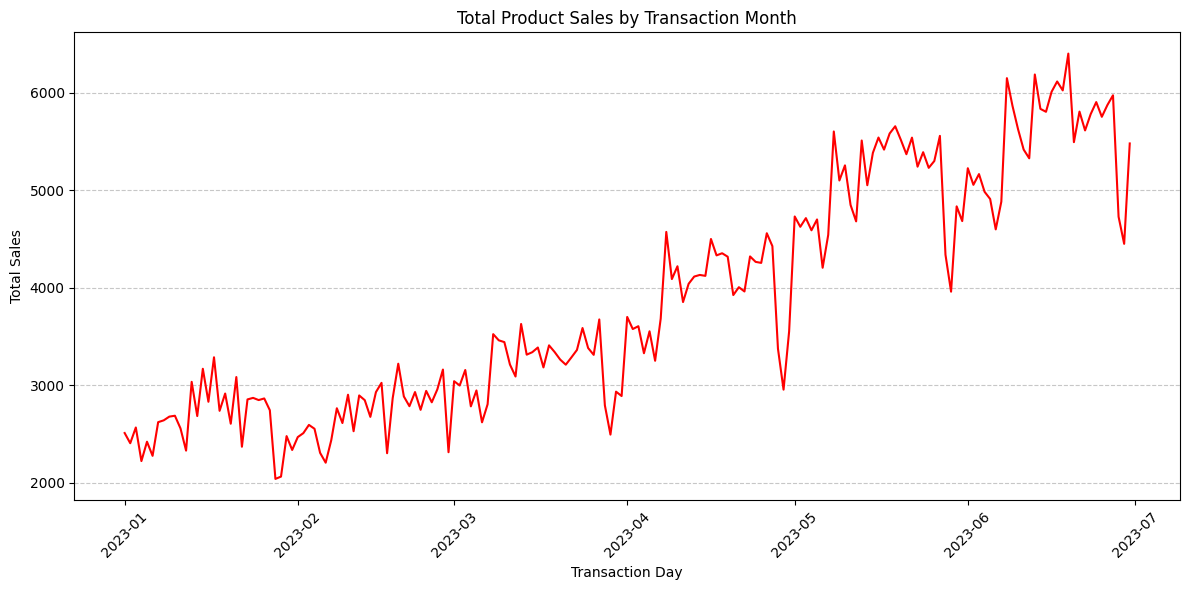

In [30]:
df_coffee['total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']
df_coffee['transaction_date'] = pd.to_datetime(df_coffee['transaction_date'])
total_sales_by_day = df_coffee.groupby(df_coffee['transaction_date'].dt.date)['total_sales'].sum().reset_index()
total_sales_by_day.columns = ['Transaction Day', 'Total Sales']

plt.figure(figsize=(12, 6))
plt.plot(total_sales_by_day['Transaction Day'], total_sales_by_day['Total Sales'], color='r', linestyle='-')
plt.title('Total Product Sales by Transaction Month')
plt.xlabel('Transaction Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

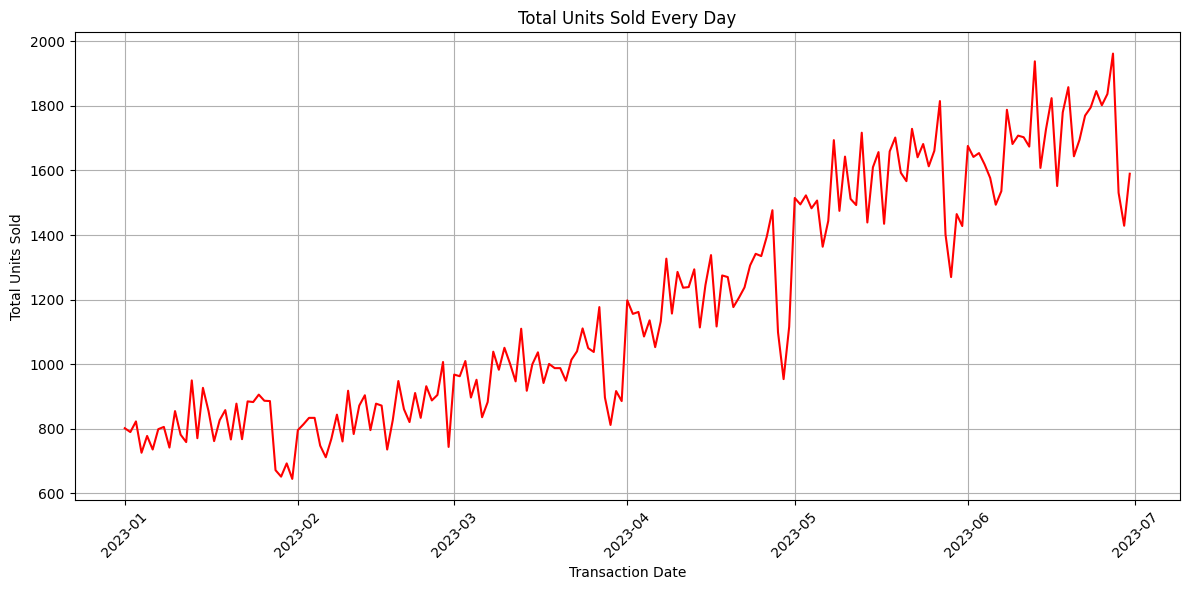

In [31]:
daily_sales = df_coffee.groupby('transaction_date').agg({
    'transaction_qty': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['transaction_date'], daily_sales['transaction_qty'], color='r', linestyle='-')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold Every Day')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

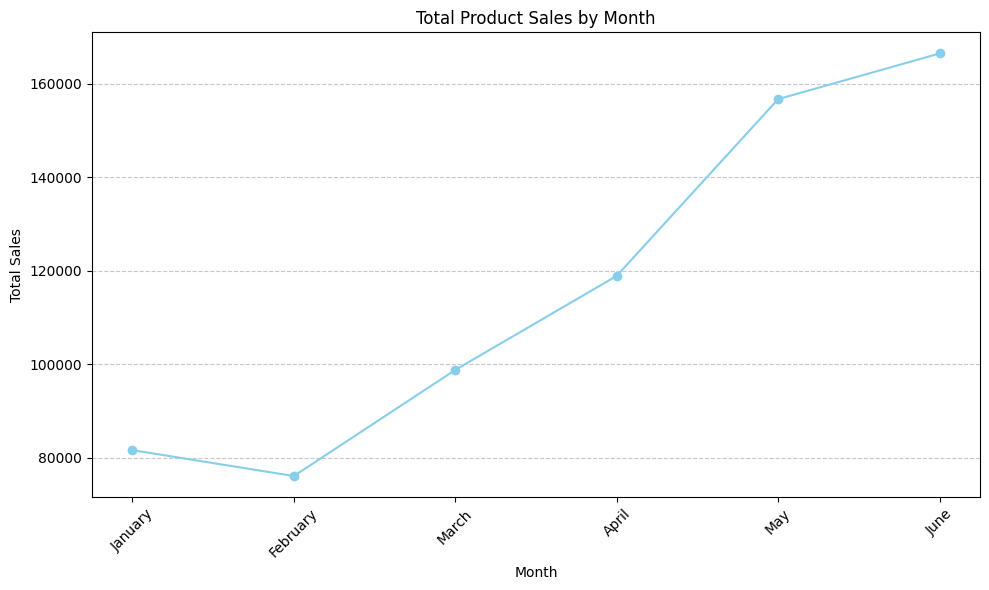

In [32]:
df_coffee['total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']
df_coffee['transaction_date'] = pd.to_datetime(df_coffee['transaction_date'])
total_sales_by_month = df_coffee.groupby(df_coffee['transaction_date'].dt.month)['total_sales'].sum().reset_index()
total_sales_by_month.columns = ['Month', 'Total Sales']
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
total_sales_by_month['Month'] = total_sales_by_month['Month'].apply(lambda x: month_names[x - 1])

plt.figure(figsize=(10, 6))
plt.plot(total_sales_by_month['Month'], total_sales_by_month['Total Sales'], marker='o', color='skyblue', linestyle='-')
plt.title('Total Product Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

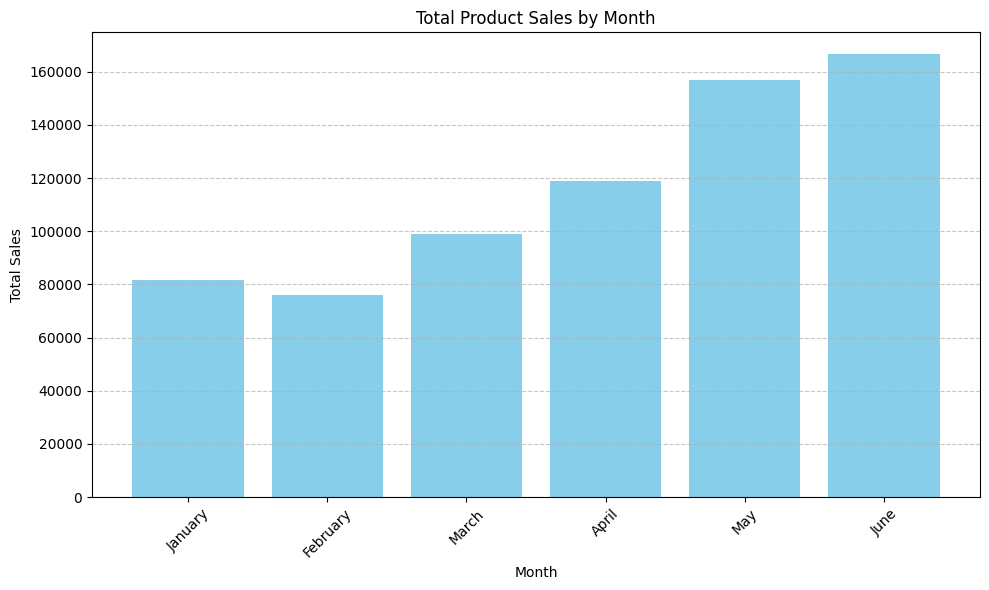

In [33]:
df_coffee['total_sales'] = df_coffee['transaction_qty'] * df_coffee['unit_price']
df_coffee['transaction_date'] = pd.to_datetime(df_coffee['transaction_date'])
total_sales_by_month = df_coffee.groupby(df_coffee['transaction_date'].dt.month)['total_sales'].sum().reset_index()
total_sales_by_month.columns = ['Month', 'Total Sales']
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
total_sales_by_month['Month'] = total_sales_by_month['Month'].apply(lambda x: month_names[x - 1])

plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_month['Month'], total_sales_by_month['Total Sales'], color='skyblue')
plt.title('Total Product Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

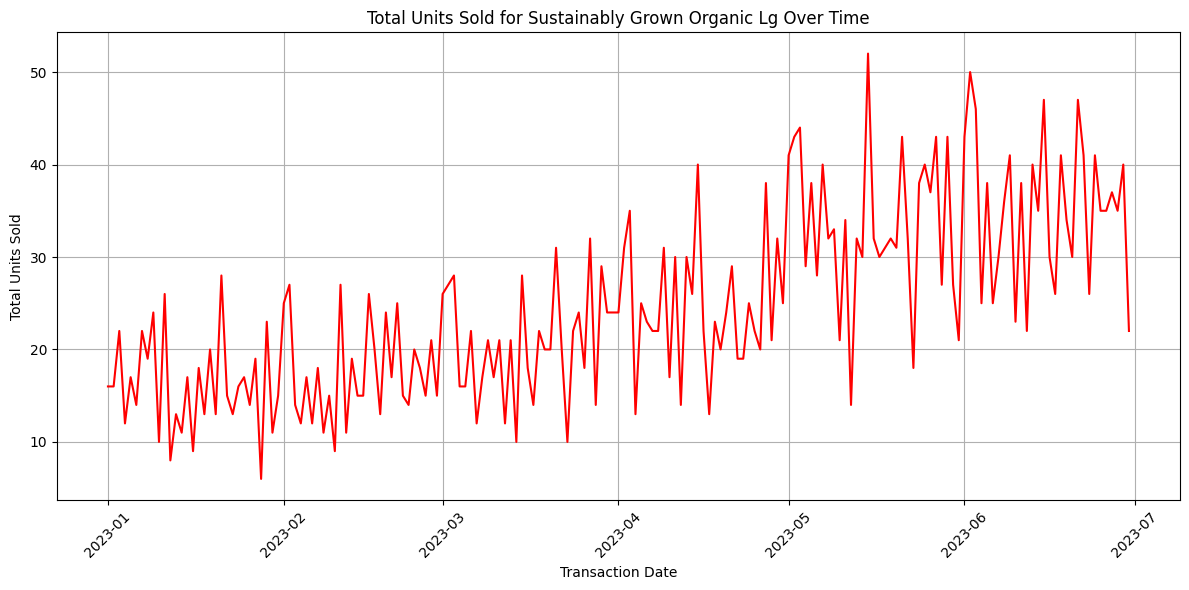

In [34]:
# According EDA, most highest earnings is Sustainably Grown Organic Lg
product_name = 'Sustainably Grown Organic Lg'
product_sales = df_coffee[df_coffee['product_detail'] == product_name]
daily_product_sales = product_sales.groupby('transaction_date').agg({
    'transaction_qty': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_product_sales['transaction_date'], daily_product_sales['transaction_qty'], color='red')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.title(f'Total Units Sold for {product_name} Over Time')
plt.xticks(rotation=45)
plt.grid(linewidth=0.8)
plt.tight_layout()
plt.show()

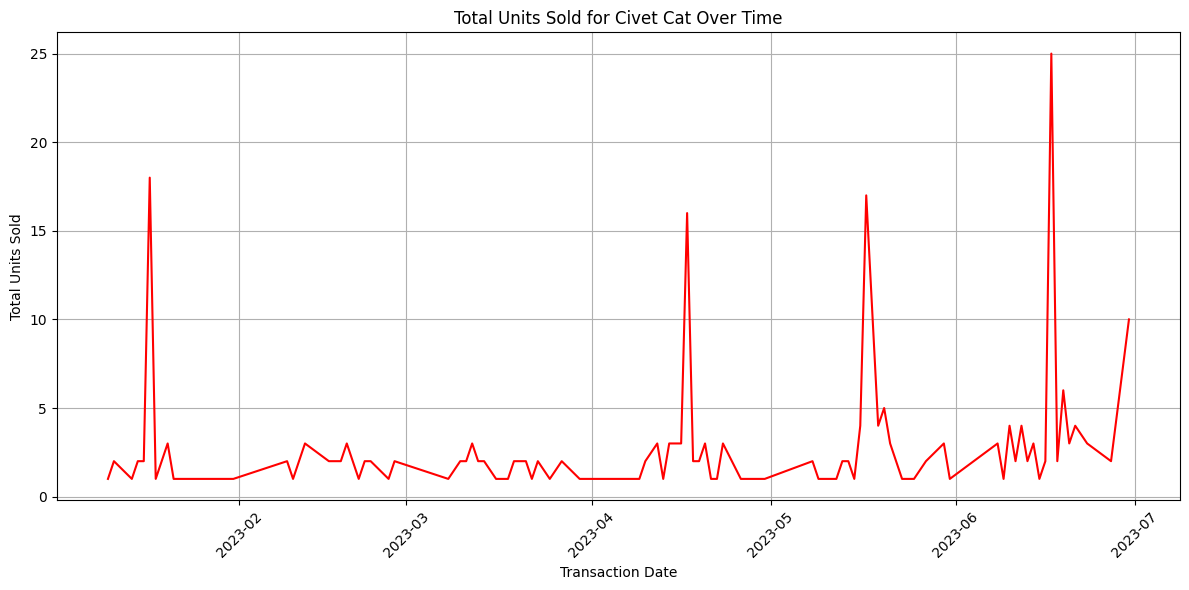

In [35]:
product_name = 'Civet Cat'
product_sales = df_coffee[df_coffee['product_detail'] == product_name]
daily_product_sales = product_sales.groupby('transaction_date').agg({
    'transaction_qty': 'sum'
}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(daily_product_sales['transaction_date'], daily_product_sales['transaction_qty'], color='red')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.title(f'Total Units Sold for {product_name} Over Time')
plt.xticks(rotation=45)
plt.grid(linewidth=0.8)
plt.tight_layout()
plt.show()

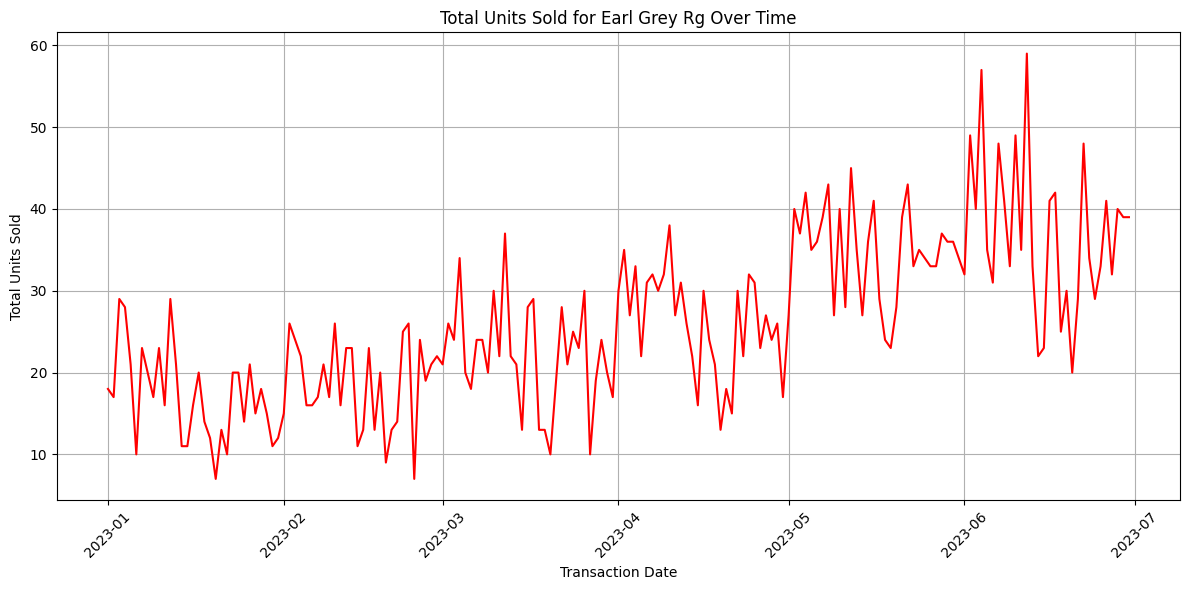

In [36]:
product_name = 'Earl Grey Rg'
product_sales = df_coffee[df_coffee['product_detail'] == product_name]
daily_product_sales = product_sales.groupby('transaction_date').agg({
    'transaction_qty': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_product_sales['transaction_date'], daily_product_sales['transaction_qty'], color='red')
plt.xlabel('Transaction Date')
plt.ylabel('Total Units Sold')
plt.title(f'Total Units Sold for {product_name} Over Time')
plt.xticks(rotation=45)
plt.grid(linewidth=0.8)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

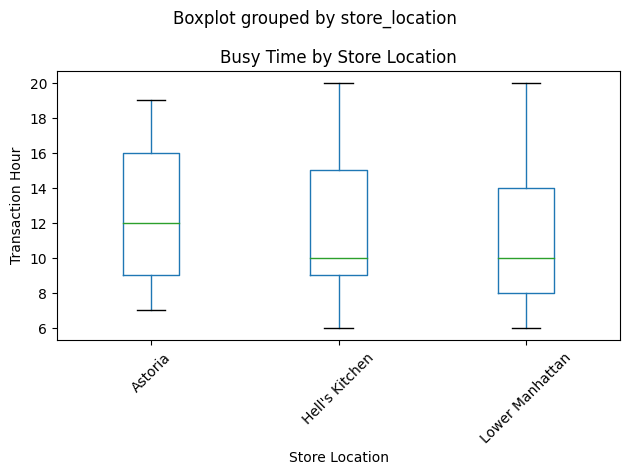

In [37]:
df_coffee['transaction_time'] = pd.to_timedelta(df_coffee['transaction_time'])
df_coffee['transaction_hour'] = df_coffee['transaction_time'].dt.components['hours']

plt.figure(figsize=(10, 6))
df_coffee.boxplot(column='transaction_hour', by='store_location', grid=False)
plt.title('Busy Time by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Transaction Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

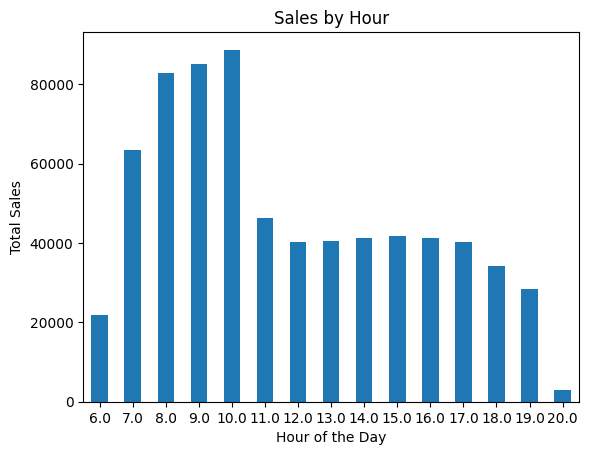

In [38]:
df_coffee['Hour'] = df_coffee['transaction_time'].dt.total_seconds() // 3600
sales_by_hour = df_coffee.groupby('Hour')['total_sales'].sum()

sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

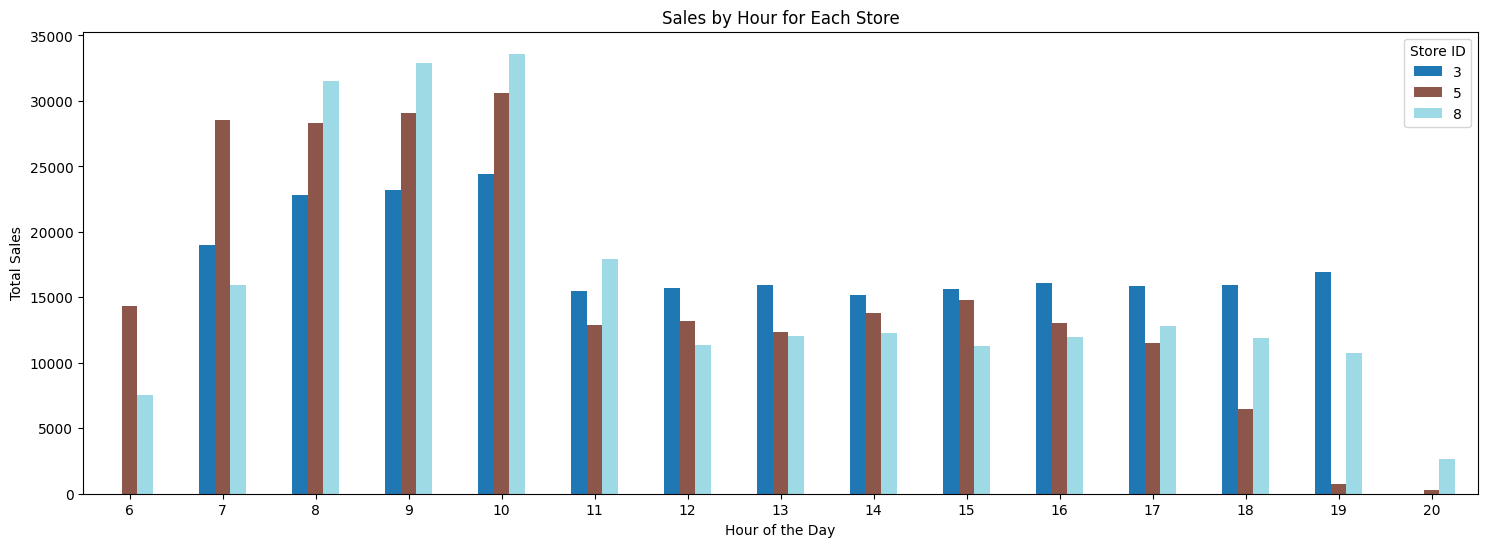

In [39]:
sales_by_hour_store = df_coffee.groupby(['transaction_hour', 'store_id'])['total_sales'].sum().unstack()
sales_by_hour_store.plot(kind='bar', colormap='tab20', figsize=(18, 6))

plt.title('Sales by Hour for Each Store')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Store ID')
plt.show()

Average number of transactions on Friday: 21701.00
Average number of transactions on Monday: 21643.00
Average number of transactions on Saturday: 20510.00
Average number of transactions on Sunday: 21096.00
Average number of transactions on Thursday: 21654.00
Average number of transactions on Tuesday: 21202.00
Average number of transactions on Wednesday: 21310.00


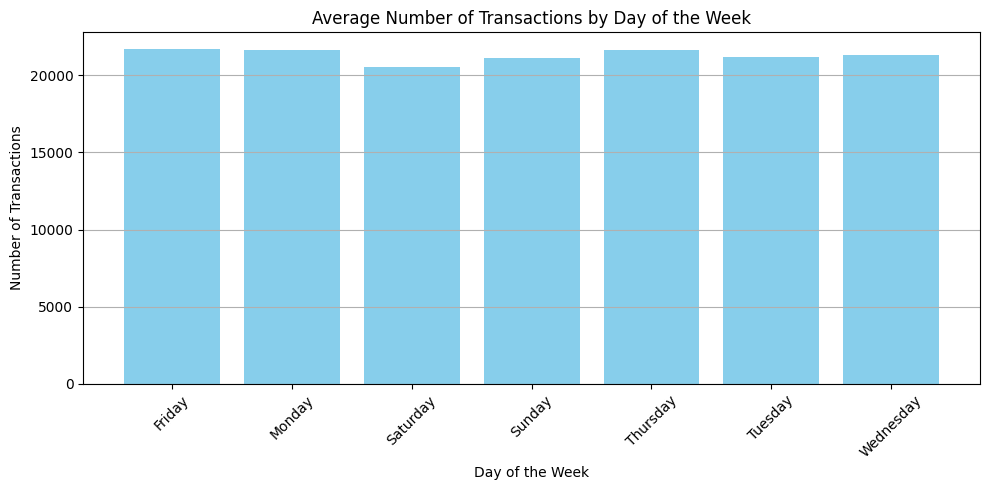

In [40]:
weekly_transactions = df_coffee.groupby('day_of_week')['transaction_id'].count().reset_index()
weekly_transactions = weekly_transactions.rename(columns={'transaction_id': 'transaction_count'})
average_transactions = weekly_transactions['transaction_count'].mean()
for index, row in weekly_transactions.iterrows():
    print(f"Average number of transactions on {row['day_of_week']}: {row['transaction_count']:.2f}")

plt.figure(figsize=(10, 5))
plt.bar(weekly_transactions['day_of_week'], weekly_transactions['transaction_count'], color='skyblue')
plt.title('Average Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

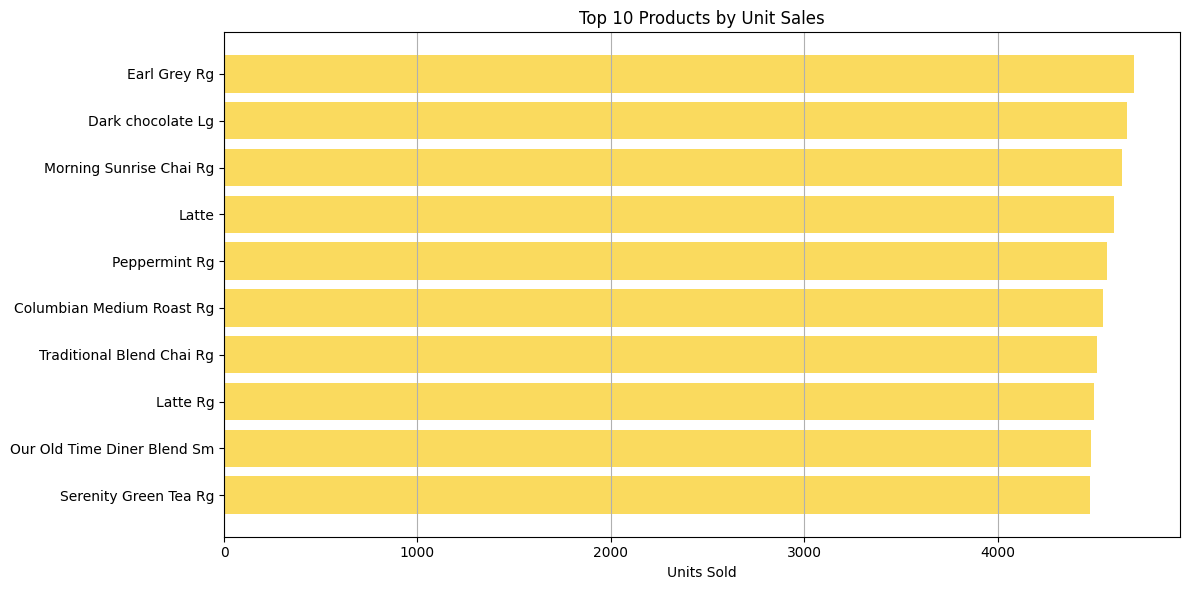

In [41]:
top_units_sold = df_coffee.groupby(['product_id', 'product_category', 'product_type', 'product_detail']).agg({
    'transaction_qty': 'sum'
}).reset_index()
top_units_sold = top_units_sold.nlargest(10, 'transaction_qty')

plt.figure(figsize=(12, 6))
plt.barh(top_units_sold['product_detail'], top_units_sold['transaction_qty'], color='#FADA5E')
plt.xlabel('Units Sold')
plt.title('Top 10 Products by Unit Sales')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

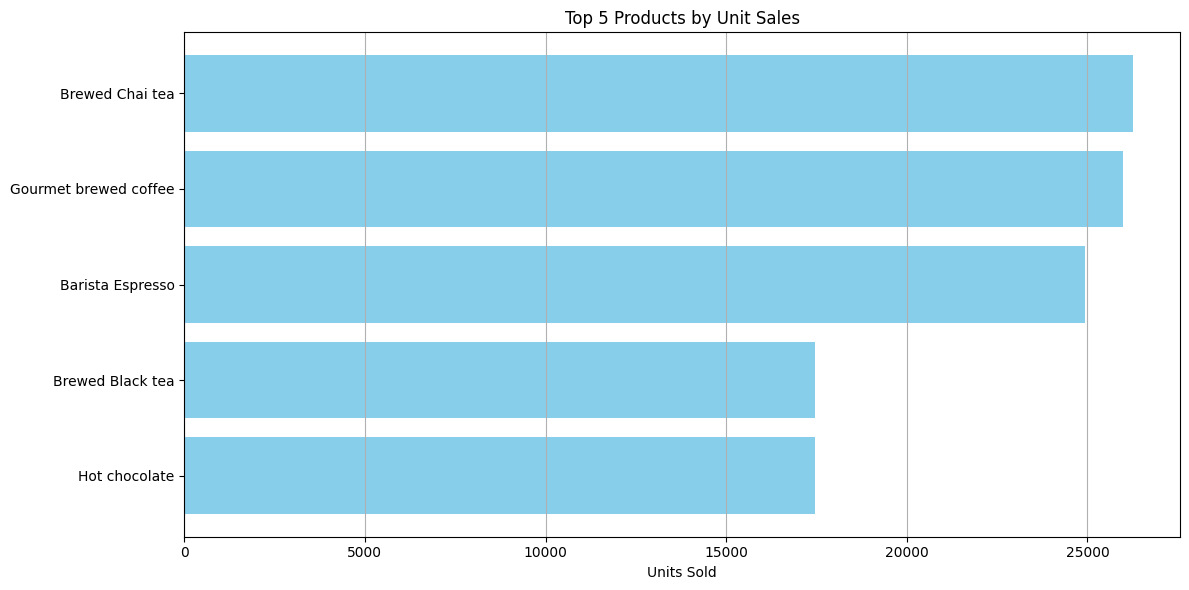

In [42]:
top_types_sold = df_coffee.groupby('product_type').agg({
    'transaction_qty': 'sum'
}).reset_index()
top_types_sold = top_types_sold.nlargest(5, 'transaction_qty')

plt.figure(figsize=(12, 6))
plt.barh(top_types_sold['product_type'], top_types_sold['transaction_qty'], color='skyblue')
plt.xlabel('Units Sold')
plt.title('Top 5 Products by Unit Sales')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

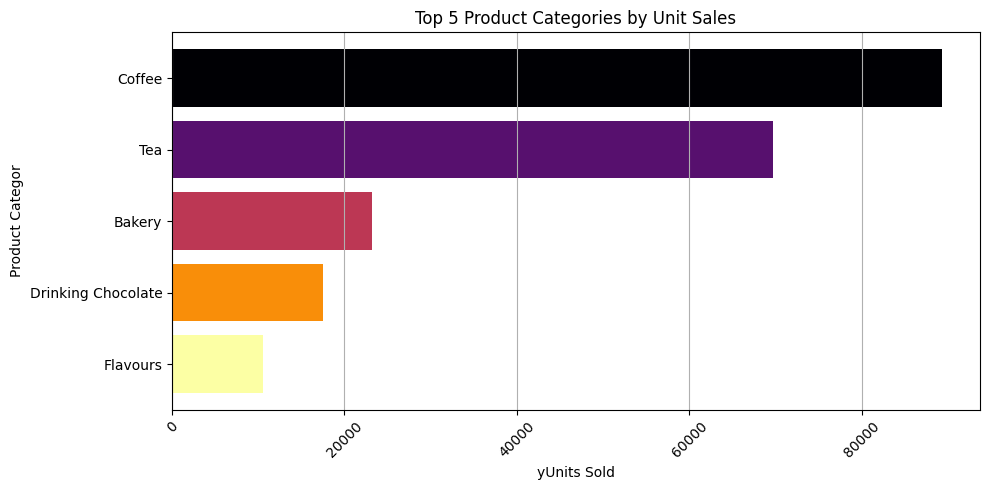

In [43]:
top_categories_sold = df_coffee.groupby('product_category').agg({
    'transaction_qty': 'sum'
}).reset_index()
top_categories_sold = top_categories_sold.nlargest(5, 'transaction_qty')
colors = plt.cm.inferno(np.linspace(0, 1, len(top_categories_sold)))

plt.figure(figsize=(10, 5))
plt.barh(top_categories_sold['product_category'], top_categories_sold['transaction_qty'], color=colors)
plt.xlabel('yUnits Sold')
plt.ylabel('Product Categor')
plt.title('Top 5 Product Categories by Unit Sales')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()